# Setting up the environment 

In [47]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.datasets import load_iris
from math import sqrt
from math import pi
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 5)  #set default figure size
import numpy as np
from numpy import exp
from scipy.special import factorial
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.api as sm
from statsmodels.api import Poisson
from scipy import stats
from scipy.stats import norm
from statsmodels.iolib.summary2 import summary_col
import seaborn as sn


# Defining the implementation and plotting function

In [48]:
#This function is used for calculating the likelihood of a feature given a the class parameters mean and std.
#This function is used under plot_likelihood function to calculate and plot the liklihood of any class.

def calculate_probability(x, mean, stdev):
    exponent = exp(-((x-mean)**2 / (2 * stdev**2 )))
    return (1 / (sqrt(2 * pi) * stdev)) * exponent

In [49]:
#This fuction plots the pdf for ONE feature given the mean and the std. for each class. 
#Its input argument is the array of means and the std arrays for each class.

def plot_likelihood(mean_array,std_array): 
    plt.figure(figsize=(10, 5))

    fig, ax = plt.subplots()

    for i in range(0,3):
        dataset=[]
        for j in sepal_l_series:
            dataset.append(calculate_probability(j,mean_array[i],std_array[i]))
        ax.plot(sepal_l_series,
                dataset,
                label=f'{labels[i]}',
                linewidth=5,
                alpha=0.5)

    ax.grid()
    ax.legend()

    ax.set_xlabel('Sepal Length')
    ax.set_ylabel('Likelihood')

    plt.title('Likelihood of sepal length')

#     ax.axis(xmin=2,xmax=10)
    plt.show()

In [50]:
#This function plots the posterior probability for each class its input argument is the classifier.

def plot_posterior(classifier):
    Z2=classifier.predict_proba(features)
#     plt.rcParams["figure.figsize"] = (8, 12)
    fig=plt.figure(figsize=(8,8), dpi= 100, facecolor='w', edgecolor='k')
    fig, ax = plt.subplots()
    
    for i in range(3):
        plt.plot(Data_index,
                    Z2[:,i],
                    label=f'{labels[i]}',
                    linewidth=2,
                    alpha=0.5)

    ax.grid()
    ax.legend()
    ax.set_xlabel('Data Index')
    ax.set_ylabel('Posterior probabilities')
    plt.title('Posterior probabilities plot')

    plt.show()

In [51]:
#plotting the decision boundaries for the classifier.

def plot_regions(classifier):
    h = .02 
    x_min=C.loc["min"].at["sepal length (cm)"]-1
    x_max=C.loc["max"].at["sepal length (cm)"]+1
    y_min=C.loc["min"].at["sepal width (cm)"]-1
    y_max=C.loc["max"].at["sepal width (cm)"]+1
    xx, yy = np.meshgrid(np.arange(x_min,x_max, h),
                         np.arange(y_min,y_max, h))

    plt.subplot(1, 2, 1)
    Z = classifier.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    Z= Z.reshape((xx.shape[0], xx.shape[1], 3))
    plt.imshow(Z, extent=(x_min, x_max, y_min, y_max), origin="lower")

    # Plot also the training points
    plt.scatter(X_dset[:, 0], X_dset[:, 1], c=np.array(["r", "g", "b"])[y_dset.astype(int)],edgecolors=(0, 0, 0))
    plt.scatter(0,0,c='g')
    plt.scatter(0,0,c='b')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title('Posterior regions')
    plt.legend(labels)
    plt.tight_layout()
    plt.show()

# Loading Iris dataset

In [52]:
iris = load_iris()


df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
labels=iris.target_names



Iris2d=df.drop(columns=["petal length (cm)","petal width (cm)"]) #dropping the last two features

C=Iris2d.describe()
Iris2d

,sepal length (cm),sepal width (cm),target
0,5.1,3.5,0.0
1,4.9,3.0,0.0
2,4.7,3.2,0.0
3,4.6,3.1,0.0
4,5.0,3.6,0.0
...,...,...,...
145,6.7,3.0,2.0
146,6.3,2.5,2.0
147,6.5,3.0,2.0
148,6.2,3.4,2.0


In [53]:
features=[]
features.append(Iris2d["sepal length (cm)"])
features.append((Iris2d["sepal width (cm)"]))
features=np.array(features)
features=features.transpose()
Data_index=np.array(range(150))           


# Calculating the mean and std for each feature per each class

In [54]:
Setosa=Iris2d.loc[Iris2d['target'] == 0]
Virginica=Iris2d.loc[Iris2d['target'] == 2]
Versicolor=Iris2d.loc[Iris2d['target'] == 1]


C1=Setosa.describe()

C2=Versicolor.describe()

C3=Virginica.describe()


In [55]:
mn_l=[C1.loc["mean"].at["sepal length (cm)"],C2.loc["mean"].at["sepal length (cm)"],C3.loc["mean"].at["sepal length (cm)"]]
std_l=[C1.loc["std"].at["sepal length (cm)"],C2.loc["std"].at["sepal length (cm)"],C3.loc["std"].at["sepal length (cm)"]]

print(std_l)
print(mn_l)

[0.3524896872134512, 0.5161711470638635, 0.635879593274432]
[5.005999999999999, 5.936, 6.587999999999998]


In [56]:
sepal_l_series= np.linspace(C.loc["min"].at["sepal length (cm)"]-1,C.loc["max"].at["sepal length (cm)"]+1,1000)
sepal_w_series=np.linspace(C.loc["min"].at["sepal width (cm)"]-1,C.loc["max"].at["sepal width (cm)"]+1,1000)
X_series=[]
X_series.append(sepal_l_series)
X_series.append(sepal_w_series)
X_series=np.array(X_series)
X_series=X_series.transpose()
X_series

array([[3.3       , 1.        ],
       [3.30560561, 1.0044044 ],
       [3.31121121, 1.00880881],
       ...,
       [8.88878879, 5.39119119],
       [8.89439439, 5.3955956 ],
       [8.9       , 5.4       ]])

<Figure size 720x360 with 0 Axes>

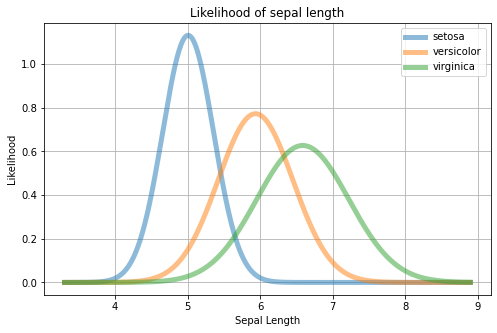

In [57]:
plot_likelihood(mn_l,std_l)

In [58]:
dset = Iris2d.to_numpy()
X_dset = dset[:, 0:2]
y_dset = dset[:,2]
clf = GaussianNB()
clf.fit(X_dset,y_dset)
print("Model accuracy: ",clf.score(X_dset,y_dset))

Model accuracy:  0.78


<Figure size 800x800 with 0 Axes>

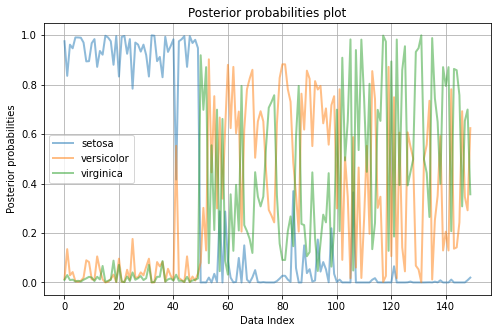

In [59]:
plot_posterior(clf)

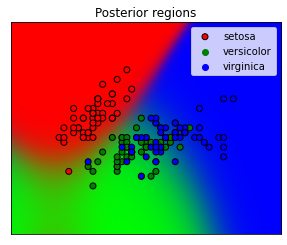

In [60]:
plot_regions(clf)

# Changing the mean for each class to 5.5

In [61]:
dset = Iris2d.to_numpy()
X_dset = dset[:, 0:2]
y_dset = dset[:,2]

clf = GaussianNB()

clf.fit(X_dset,y_dset)

means=np.array([[5.5, 3.428],[5.5, 2.77 ],[5.5, 2.974]])
clf.theta_=(means)

print("Model accuracy: ",clf.score(X_dset,y_dset))


Model accuracy:  0.6266666666666667


<Figure size 720x360 with 0 Axes>

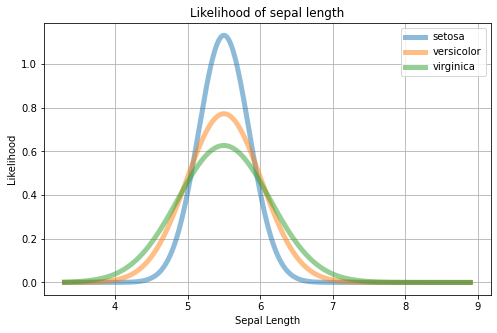

In [62]:
mn_1=[5.5,5.5,5.5]
plot_likelihood(mn_1,std_l)

<Figure size 800x800 with 0 Axes>

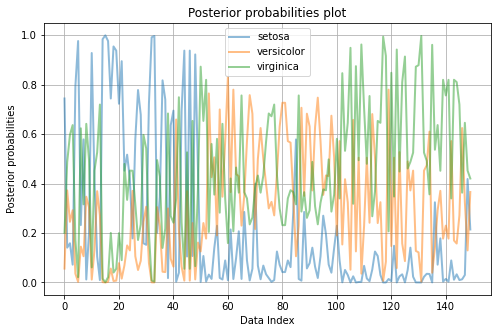

In [63]:
plot_posterior(clf)

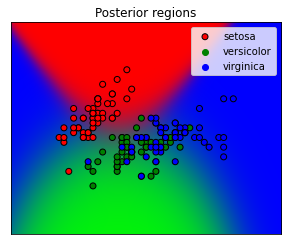

In [64]:
plot_regions(clf)

# Changing the standard deviation for each class to 0.26

In [65]:
clf = GaussianNB()

clf.fit(X_dset,y_dset)

std=np.array([[0.0676, 0.140816],
       [0.0676, 0.0965  ],
       [0.0676, 0.101924]])

clf.sigma_=(std)

print("Model accuracy: ",clf.score(X_dset,y_dset))



Model accuracy:  0.7866666666666666


<Figure size 720x360 with 0 Axes>

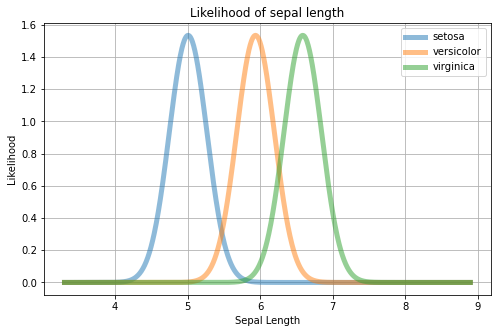

In [66]:
std_1=[.26,.26,.26]
plot_likelihood(mn_l,std_1)

<Figure size 800x800 with 0 Axes>

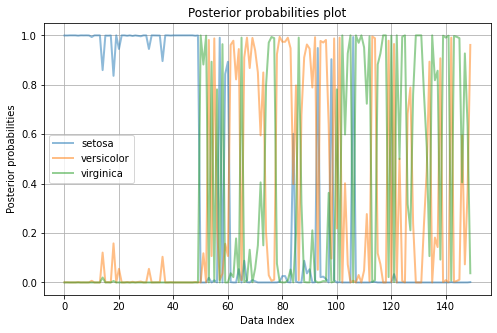

In [67]:
plot_posterior(clf)

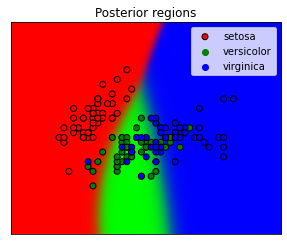

In [68]:
plot_regions(clf)

In [69]:
fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')


<Figure size 1200x800 with 0 Axes>